<a href="https://colab.research.google.com/github/tomfaulkenberry/courses/blob/master/summer2019/mathpsych/lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2 - Fitting a "forgetting curve"

It is well known that once we learn something, we tend forget some things as time passes.  

Murdock (1961) presented subjects with a set of memory items (i.e., words or letters) and asked them to recall the items after six different retention intervals: $t=1,3,6,9,12,18$ (in seconds).  He recorded the proportion recalled at each retention interval (based on 100 independent trials for each $t$). These data were (respectively)

$$
y=0.94, 0.77, 0.40, 0.26, 0.24, 0.16
$$

**Our goal**: fit a mathematical model that will predict the proportion recalled $y$ as a function of retention interval ($t$)

## First step - look at the data!

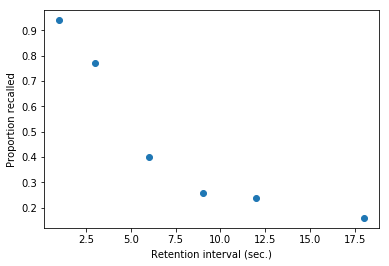

In [0]:
import matplotlib.pyplot as plt
from numpy import *

T = array([1,3,6,9,12,18])
Y = array([0.94, 0.77, 0.40, 0.26, 0.24, 0.16])

plt.plot(T, Y, 'o')
plt.xlabel('Retention interval (sec.)')
plt.ylabel('Proportion recalled')
plt.show()

Some things to notice:

*   our model should be a *decreasing* function
*   it is NOT linear

Two candidate models:

*   Power function model: $y=ax^b$
*   Exponential model: $y=ab^x$

Which one should we use?





## mathematical properties?

Take logs and look at structure of data


Power function model:  $\ln y = \ln a + b\ln x$
* so power $\implies$ $\ln y$ should be *linear* wrt $\ln x$


Exponential model: $\ln y = \ln a + x\ln b$ 
* so exponential $\implies$ $\ln y$ should be *linear* wrt $x$




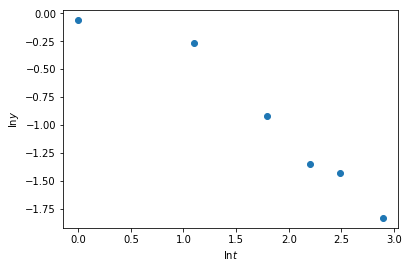

In [0]:
# check power function model

plt.plot(log(T), log(Y), 'o')
plt.xlabel('$\ln t$')
plt.ylabel('$\ln y$')
plt.show()

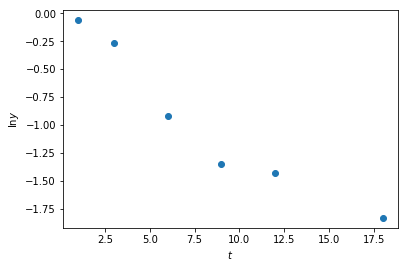

In [0]:
# check exponential model

plt.plot(T, log(Y), 'o')
plt.xlabel('$t$')
plt.ylabel('$\ln y$')
plt.show()

Both are reasonably linear, but neither is a perfect fit!

## Fit both models with MLE 

At this point, our best bet is to find parameter sets for both models that provide best fit to observed data $y$.  We will use maximum likelihood estimation.

### Step 1 -- compute the likelihood function

First, let's cast our data as the number of items recalled correctly on $n=100$ trials.  

In [0]:
X = 100*Y
print(X)

[94. 77. 40. 26. 24. 16.]


Let's assume each of these 100 trials is independent of the others, and consider each trial a *success* if item is correctly recalled.

Then the probability of correctly recalling $x$ items is:

$$
f(x\mid\theta) = \binom{100}{x}\theta^x(1-\theta)^{100-x}
$$

The critical parameter here is $\theta$ -- the probability of success on any *one* trial.  How do we determine $\theta$?

Let's assume that probability of recall is governed by a **power function**.  That is, assume

$$
\theta(t) = at^b
$$

for constants $a,b$.

Then we can write
$$
f(x\mid a,b) = \binom{100}{x}(at^b)^x(1-at^b)^{100-x}
$$

which we cast as a likelihood

$$
L(a,b\mid x) = \binom{100}{x}(at^b)^x(1-at^b)^{100-x}
$$


### Step 2 -- compute log likelihood

This gives us:

$$
\ln L = \ln \Biggl[ \binom{100}{x}\Biggr] + x\ln(at^b) + (100-x)\ln(1-at^b)
$$

### Step 3 -- extend to multiple observations

Note that the formula above is for a *single* observation $x$.  But we have 5 observations!

If we assume each is independent from the others, then we can multiply the likelihoods:

$$
L(a,b\mid x=(x_1,\dots,x_5)) = \prod_{i=1}^5 L(a,b\mid x_i)
$$

Thus we have

$$
\ln L = \ln\Biggl(\prod_{i=1}^5 L(a,b\mid x_i)\Biggr )
$$

But since logs turn products into sums, we can write

$$ \ln L = \sum_{i=1}^5 \ln L(a,b\mid x_i) = \sum_{i=1}^5 \Biggl(\ln \binom{100}{x_i} + x_i\ln(at^b) + (100-x_i)\ln(1-at^b)\Biggr)$$

*Notes:*

* we really only care about the terms that have $a$ and $b$, so we'll ignore the binomial term
* Python really likes to *minimize*. So, we will minimize the *negative* log likelihood (NLL)

In [0]:
def nllP(pars):
  a, b = pars
  tmp1 = X*log(a*T**b) 
  tmp2 = (100-X)*log(1-a*T**b)
  return(-1*sum(tmp1+tmp2))

In [0]:
# check some examples

a = 0.7
b = -0.3
pars = array([a,b])

nllP(pars)

342.66374789823806

In [0]:
from scipy.optimize import minimize

a_init = random.uniform()
b_init = -random.uniform()
inits = array([a_init, b_init])

mle = minimize(nllP, 
               init,
               method="nelder-mead")
print(mle)

 final_simplex: (array([[ 0.9531476 , -0.497923  ],
       [ 0.95311059, -0.49797048],
       [ 0.95308019, -0.49791551]]), array([313.36519997, 313.36520006, 313.36520149]))
           fun: 313.36519996537464
       message: 'Optimization terminated successfully.'
          nfev: 70
           nit: 36
        status: 0
       success: True
             x: array([ 0.9531476, -0.497923 ])


a=0.953, b=-0.498


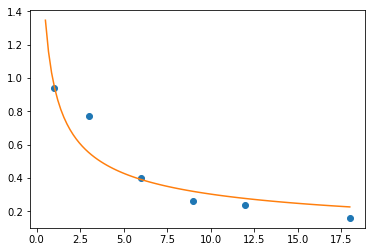

In [0]:
def power(t,pars):
  a, b = pars
  return(a*t**b)

fitPars = mle.x
print(f"a={fitPars[0]:.3f}, b={fitPars[1]:.3f}")

fig, ax = plt.subplots()

x = linspace(0.5,18,100)
ax.plot(T,Y,'o')
ax.plot(x, power(x,fitPars))

plt.show()
      

## Exercises

1. Often, the "power law of forgetting" is written as $f(t) = at^{-b}$ (e.g., Wixted, 1990), the purpose of which is to reinforce the idea that forgetting = decay.  What does this change do to the likelihood function?  Use Python to compute MLEs for $a$ and $b$ given the observed data $y$ above.

2. Demonstrate (either through computation or a mathematical proof) that we can safely ignore the $\binom{100}{x_i}$ term in the likelihood function.

3. Rubin and Baddeley (1989) measured the proportion of participants who correctly recalled details from a past colloquium talk as a function of time in years.  The data below are approximately equal to what they orignally found:

|time (years) | proportion recall|
|:--:|:--:|
| 0.05 | 0.38|
|0.25 | 0.26|
|0.30|0.22|
|0.60|0.20|
|0.95|0.11|
|1.3|0.07|
|1.4|0.16|
|1.6|0.10|
|1.8|0.08|
|2.5|0.05|
|2.7|0.01|

For simplicity, assume there were 100 participants. Construct a reasonable model of forgetting for this data, and estimate its parameters.
